In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename="C:\ML\Pokemon.csv"
data=pd.read_csv(filename)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Import all the libraries and the dataset.

In [9]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Gives various statistics such as mean, standard deviation etc. for the dataset

In [10]:
data = data.drop(['#','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation'], axis = 1)
data.head()

,Name,Type 1,Type 2,Total,Legendary
0,Bulbasaur,Grass,Poison,318,False
1,Ivysaur,Grass,Poison,405,False
2,Venusaur,Grass,Poison,525,False
3,VenusaurMega Venusaur,Grass,Poison,625,False
4,Charmander,Fire,NaN,309,False


Dropping the columns that are numberical and also not relevant to the analysis

In [11]:
data["Legendary"] = data["Legendary"].astype(int)
data.head()

,Name,Type 1,Type 2,Total,Legendary
0,Bulbasaur,Grass,Poison,318,0
1,Ivysaur,Grass,Poison,405,0
2,Venusaur,Grass,Poison,525,0
3,VenusaurMega Venusaur,Grass,Poison,625,0
4,Charmander,Fire,NaN,309,0


Converting categorical ordinal data into numerical data to work with.

In [16]:
types = data['Type 1'].tolist() + data['Type 2'].dropna().tolist()
unique_types = list(set(types))

for t in unique_types:
    data[t] = 0

for index, row in data.iterrows():
    if row['Type 1'] in unique_types:
        data.loc[index, row['Type 1']] = 1
    if row['Type 2'] in unique_types:
        data.loc[index, row['Type 2']] = 1

print(data)

                      Name   Type 1  Type 2  Total  Legendary  Grass  Poison  \
0                Bulbasaur    Grass  Poison    318          0      1       1   
1                  Ivysaur    Grass  Poison    405          0      1       1   
2                 Venusaur    Grass  Poison    525          0      1       1   
3    VenusaurMega Venusaur    Grass  Poison    625          0      1       1   
4               Charmander     Fire     NaN    309          0      0       0   
..                     ...      ...     ...    ...        ...    ...     ...   
795                Diancie     Rock   Fairy    600          1      0       0   
796    DiancieMega Diancie     Rock   Fairy    700          1      0       0   
797    HoopaHoopa Confined  Psychic   Ghost    600          1      0       0   
798     HoopaHoopa Unbound  Psychic    Dark    680          1      0       0   
799              Volcanion     Fire   Water    600          1      0       0   

     Fire  Flying  Dragon  ...  Electri

Performing one hot encoding to convert both 'Type 1' and 'Type 2' into numerical values (Did not use get_dummies as it would create twice the columns required)

In [17]:
data.head()

,Name,Type 1,Type 2,Total,Legendary,Grass,Poison,Fire,Flying,Dragon,...,Electric,Ground,Fairy,Fighting,Psychic,Rock,Steel,Ice,Ghost,Dark
0,Bulbasaur,Grass,Poison,318,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ivysaur,Grass,Poison,405,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Venusaur,Grass,Poison,525,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,VenusaurMega Venusaur,Grass,Poison,625,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charmander,Fire,NaN,309,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Univariate analysis:

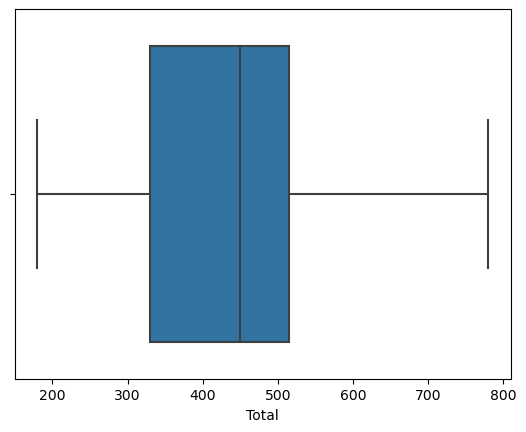

In [18]:
sns.boxplot(data=data, x= "Total")
plt.show()

Bivariate analysis:

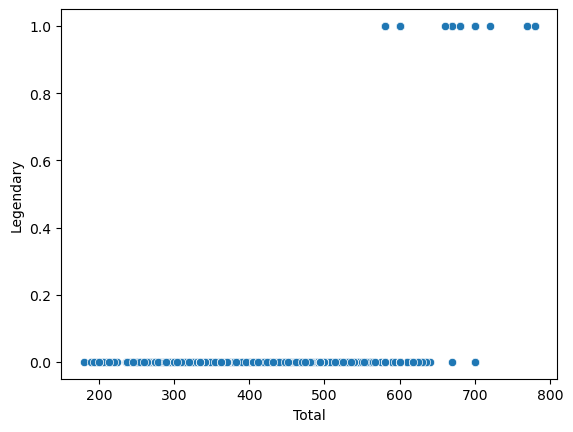

In [24]:
sns.scatterplot(data=data, y="Legendary", x="Total")
plt.show()

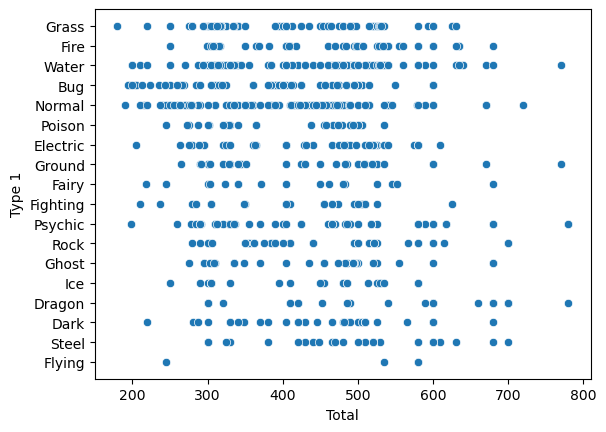

In [23]:
sns.scatterplot(data=data, y="Type 1", x="Total")
plt.show()

Multivariate analysis:

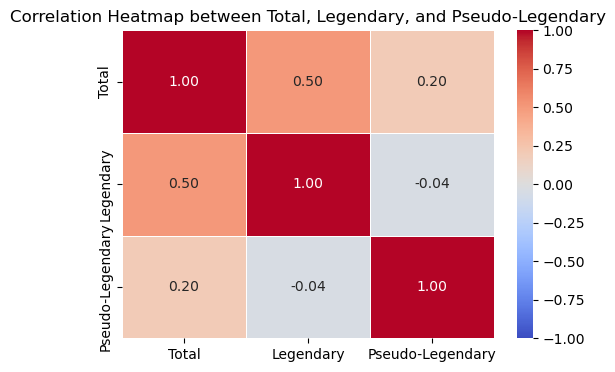

In [26]:
data["Pseudo-Legendary"] = data.apply(
    lambda row: 1 if row["Total"] >= 600 and row["Legendary"] == 0 and "Mega" not in row["Name"] else 0, 
    axis=1
)

columns = ['Total', 'Legendary', 'Pseudo-Legendary']
corr_matrix = data[columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap between Total, Legendary, and Pseudo-Legendary")
plt.show()